Create a figure of word-overlap distribution

In [1]:
% cd /home/mayu-ot/durga/Experiments/loc_iparaphrasing/

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/mnt/fs1/mayu-ot/Experiments/loc_iparaphrasing


In [2]:
df = pd.read_csv('data/phrase_pair_val.csv')

In [3]:
df.head()

,Unnamed: 0,image,phrase1,phrase2,original_phrase1,original_phrase2,ytrue,roi1,roi2
0,0,100652400,man,hard+hat,A man,a hard hat,False,116,-1
1,1,100652400,man,caution+vest,A man,a caution vest,False,116,-1
2,2,100652400,man,street,A man,the street,False,116,21
3,3,100652400,man,orange+flag,A man,an orange flag,False,116,-1
4,4,100652400,blue+hard+hat,man,a blue hard hat,A man,False,-1,116


In [4]:
def lang_iou(x, y):
    x = set(x.split('+'))
    y = set(y.split('+'))
    inter = x.intersection(y)
    union = x.union(y)
    iou = len(inter) / len(union)
    return iou

p_ious = []
for _, row in df.iterrows():
    p_iou = lang_iou(row.phrase1, row.phrase2)
    p_ious.append(p_iou)

df['p_ious'] = np.asarray(p_ious)

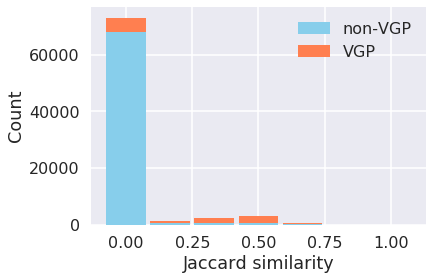

In [5]:
n_vgps = []
n_nvgps = []
x = np.linspace(0, 1, 7)
for i in x:
    sub_df = df[(df.p_ious >= i) & (df.p_ious < i + .1)]
    c = sum(sub_df.ytrue)
    n = len(sub_df)
    n_vgps.append(c)
    n_nvgps.append(n - c)

sns.set_context("poster")
plt.close('all')
plt.figure(figsize=(6, 4))
plt.bar(x, n_nvgps, width = 0.15, color='skyblue', label='non-VGP')
plt.bar(x, n_vgps, bottom=n_nvgps, width=0.15, color='coral', label='VGP')
plt.gca().set_xlabel('Jaccard similarity')
plt.gca().set_ylabel('Count')
plt.legend()
plt.savefig('figures/aaai/word-overlap_dist.pdf', bbox_inches='tight')

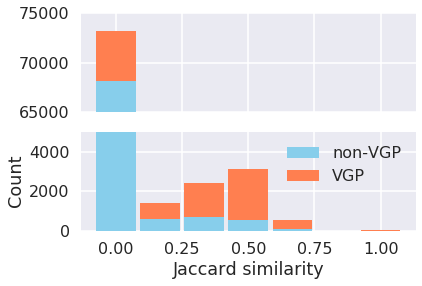

In [20]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax.bar(x, n_nvgps, width = 0.15, color='skyblue', label='non-VGP')
ax.bar(x, n_vgps, bottom=n_nvgps, width=0.15, color='coral', label='VGP')

ax2.bar(x, n_nvgps, width = 0.15, color='skyblue', label='non-VGP')
ax2.bar(x, n_vgps, bottom=n_nvgps, width=0.15, color='coral', label='VGP')

ax.set_ylim(65000, 75000)  # outliers only
ax2.set_ylim(0, 5000)  # most of the data
plt.legend()

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

ax2.set_xlabel('Jaccard similarity')
ax2.set_ylabel('Count')
plt.savefig('figures/aaai/word-overlap_dist.pdf', bbox_inches='tight')

In [68]:
def lang_iou_ORG(x, y):
    x = set(x.lower().split(' '))
    y = set(y.lower().split(' '))
    inter = x.intersection(y)
    union = x.union(y)
    iou = len(inter) / len(union)
    return iou

p_ious = []
for _, row in df.iterrows():
    p_iou = lang_iou_ORG(row.original_phrase1, row.original_phrase2)
    p_ious.append(p_iou)

df['op_ious'] = np.asarray(p_ious)

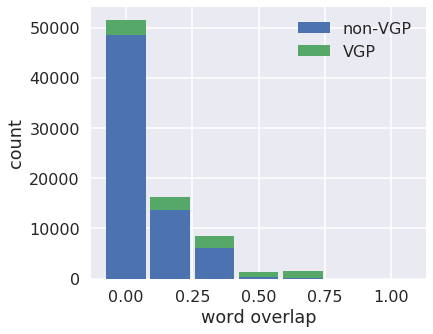

In [74]:
n_vgps = []
n_nvgps = []
x = np.linspace(0, 1, 7)
for i in x:
    sub_df = df[(df.op_ious >= i) & (df.op_ious < i + .1)]
    c = sum(sub_df.ytrue)
    n = len(sub_df)
    n_vgps.append(c)
    n_nvgps.append(n - c)
    
sns.set_context("poster")
plt.close('all')
plt.figure(figsize=(6, 5))
plt.bar(x, n_nvgps, width = 0.15, label='non-VGP')
plt.bar(x, n_vgps, bottom=n_nvgps, width = 0.15, label='VGP')
plt.gca().set_xlabel('word overlap')
plt.gca().set_ylabel('count')
plt.legend()
plt.savefig('figures/aaai/word-overlap_dist_ORG.pdf', bbox_inches='tight')